**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- McKayla David
- Sebastian Modafferi
- Anna Potapenko
- Matthew Chan
- Kirthin Rajkumar


# Research Question

On a global economic scale, do larger (on the basis of funding and quantity of employees) companies lay off a higher percentage of employees than smaller companies? What indicators specifically can be used to predict the percentage of employees laid off?


## Background and Prior Work

Layoffs refer to economic and organizational changes, and are a significant indicator of the success and development of companies. While they affect employees, layoff rates have a broader implication on the health of the economy, industry trends, and the state of the workforce. Understanding the trends and impacts of layoffs is vital not only on a global economic scale, but within communities of stakeholders and individual communities.

Layoffs are important to study due to their relevance to both companies and employees. For a company, understanding indicators which can predict imminent layoffs can help them course correct before reaching a point of no return. On the other hand, employees understanding layoff indicators can help them in choosing the correct company for their next role, ensuring job safety. 

Research published in the Journal of the European Economic Association [1^](#https://academic.oup.com/jeea/article-abstract/18/1/427/5247011) explored the economic influences that cause layoffs, and inquired into how financial health and market factors influence layoff decisions. A similar study published in Journal of Labor Economics looks into the effects of layoffs on unemployment rates, and found that layoffs can have lasting impact on the job market and employee career trajectory.

The journal of Labor Empirical Finance [3^](#https://doi.org/10.1016/s0927-5398\(01\)00024-x) also looks into the different firms and what caused their layoffs, giving insight into company restructuring and different technologies that help to modify the workforce requirements. Additionally, past precedent reviewed by JSTOR [2^](#https://www.jstor.org/stable/117002?casa_token=m7s1bFw7mY4AAAAA%3AhaYXwJWsj5E0Xo7vbnjns6omvUnSFYlenLVZ99nBhONKkQRCLyfLIdEk3ZJycob9If4HtLaMga7y7cQzrzAO6QfJYXTkccHfVciVYhTXREH7HSHuGN4) article explains the repetition of layoffs and how it correlates with economic cycles. This suggests that layoffs are an essential part of economic growth.

Research on layoffs adopts an interdisciplinary approach, using economic theories, organizational behavior, and societal impacts. Overall, it is imperative to understand the factors that influence layoffs because knowledge about these factors can help researchers develop strategies to mitigate the negative effects of layoffs on employees and the economy at large. Existing work does not provide internal indicators for when a company is about to execute layoffs, so our research seeks to identify a correlation between company size and layoffs.

1. <a name="Journal of the European Economic Association"></a> [^](#https://academic.oup.com/jeea/article-abstract/18/1/427/5247011) Gathmann, C., Helm, I., & Schönberg, U. (2018). Spillover effects of mass layoffs. Journal of the European Economic Association, 18(1), 427–468. https://doi.org/10.1093/jeea/jvy045
2. <a name="JSTOR"></a> [^](#cite_ref-2) Hallock, Kevin, (1998). Layoffs, top executive pay, and firm performance on JSTOR. (n.d.). www.jstor.org. https://www.jstor.org/stable/117002
3. <a name="Journal of Empirical Finance"></a> [^](#https://doi.org/10.1016/s0927-5398\(01\)00024-x) Chen, P., Mehrotra, V., Sivakumar, R., & Yu, W. (2001). Layoffs, shareholders’ wealth, and corporate performance. Journal of Empirical Finance, 8(2), 171–199. https://doi.org/10.1016/s0927-5398(01)00024-x


# Hypothesis


We hypothesize that larger companies lay off a higher percentage of employees, especially amidst a recession, than smaller companies. We are inclined to believe this due to the fact that smaller companies already have less employees, so lay-offs are more likely to harm the business than benefit it. Additionally, larger companies are able to withstand more financial pressure, allowing them to perform large layoffs despite the impact on company performance given that they have enough capital with withstand the losses.

# Data

## Data overview

For each dataset include the following information
- Dataset #1 - Kaggle
  - Dataset Name: "Tech Layoffs 2020-2024"
  - https://www.kaggle.com/datasets/ulrikeherold/tech-layoffs-2020-2024
  - Number of observations: 1418
  - Number of variables: 16

This dataset was webscraped from layoffs.fyi. It contains layoff data over the past 4 years which was webscraped from news articles. The key data variables we will be using are `Money_Raised_in_$_mil`, `Percentage`, `Laid_Off`, `Funding`, and `Stage`. We are focusing analysis on these columns because they contain vital information about layoffs and how the company is performing. It comes fairly clean, and the only correction required is the `Money_Raised_in_$_mil` column, as it initally was stored as a string containing a dollar sign character.

## Layoffs.fyi Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import warnings
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from statsmodels.formula.api import ols

In [2]:
df = pd.read_excel('./data/tech_layoffs.xlsx')
df.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942


In [3]:
#remove company name
df = df.drop(columns=['Company'])

In [4]:
df['Money_Raised_in_$_mil'].dtypes

dtype('O')

In [5]:
df['Funding'] = df['Money_Raised_in_$_mil'].apply(lambda s: np.float64(s[1:])) 
df['Funding'].head()

0     1700.0
1      733.0
2      116.0
3      500.0
4    15000.0
Name: Funding, dtype: float64

In [6]:
df.dtypes

#                                       int64
Location_HQ                            object
Country                                object
Continent                              object
Laid_Off                                int64
Date_layoffs                   datetime64[ns]
Percentage                            float64
Company_Size_before_Layoffs             int64
Company_Size_after_layoffs              int64
Industry                               object
Stage                                  object
Money_Raised_in_$_mil                  object
Year                                    int64
lat                                   float64
lng                                   float64
Funding                               float64
dtype: object

# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Section 1 of EDA - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [7]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

### Section 2 of EDA if you need it  - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [8]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

### Section 3 of EDA if you need it  - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

## McKayla - Industry & yearly trends

**This section begins as a focus in layoff trends by industry, however includes EDA and statistical analysis on the general topic of layoff rates by year.**

### Layoffs by industry

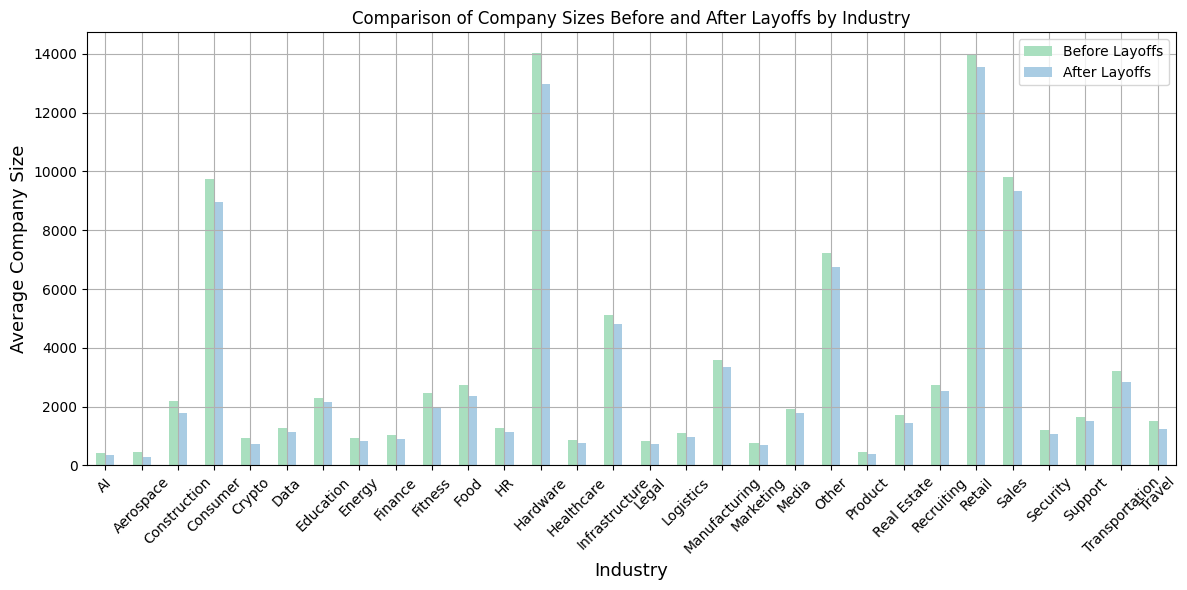

In [9]:
# company size before/after layoffs by industry
industry_sizes = df.groupby('Industry').agg({
    'Company_Size_before_Layoffs': 'mean',
    'Company_Size_after_layoffs': 'mean'
})

#plot
industry_sizes.plot(kind = 'bar', figsize = (12, 6), color  = ['#A9DFBF', '#A9CCE3'])
plt.title('Comparison of Company Sizes Before and After Layoffs by Industry')
plt.xlabel('Industry', fontsize = 13)
plt.ylabel('Average Company Size', fontsize = 13)
plt.xticks(rotation = 45)
plt.legend(['Before Layoffs', 'After Layoffs'])
plt.grid(True)
plt.tight_layout()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24580\4235804314.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', num_bars)


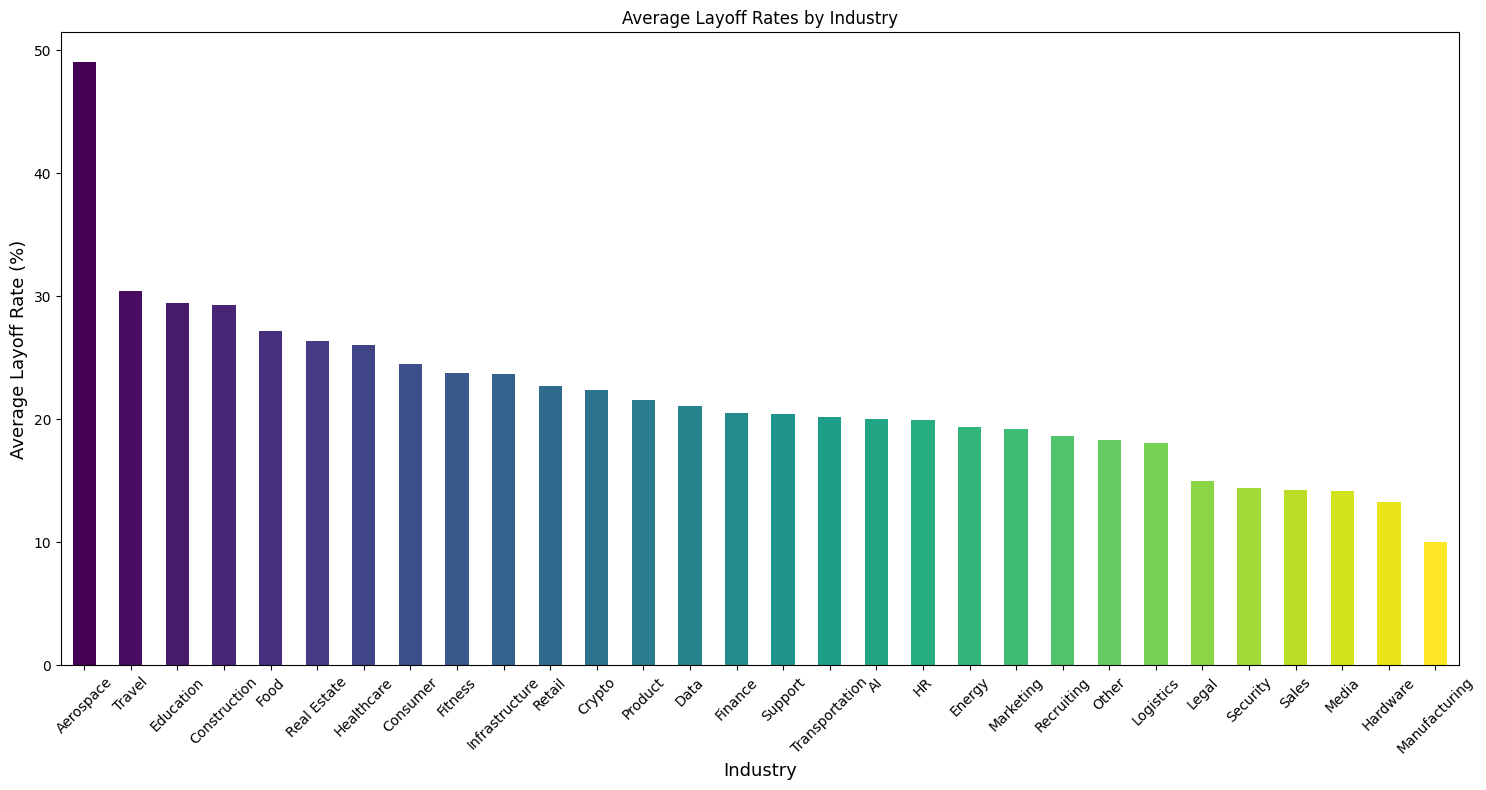

In [10]:
#group by industry percentage
industry_layoff_rates = df.groupby('Industry')['Percentage'].mean().sort_values(ascending=False)

#plot for rates
num_bars = len(industry_layoff_rates)
colors = plt.cm.get_cmap('viridis', num_bars)

plt.figure(figsize=(15, 8))
industry_layoff_rates.plot(kind='bar', color=[colors(i) for i in range(num_bars)])
plt.title('Average Layoff Rates by Industry')
plt.xlabel('Industry', fontsize = 13)
plt.ylabel('Average Layoff Rate (%)', fontsize = 13)
plt.xticks(rotation=45)
plt.tight_layout()

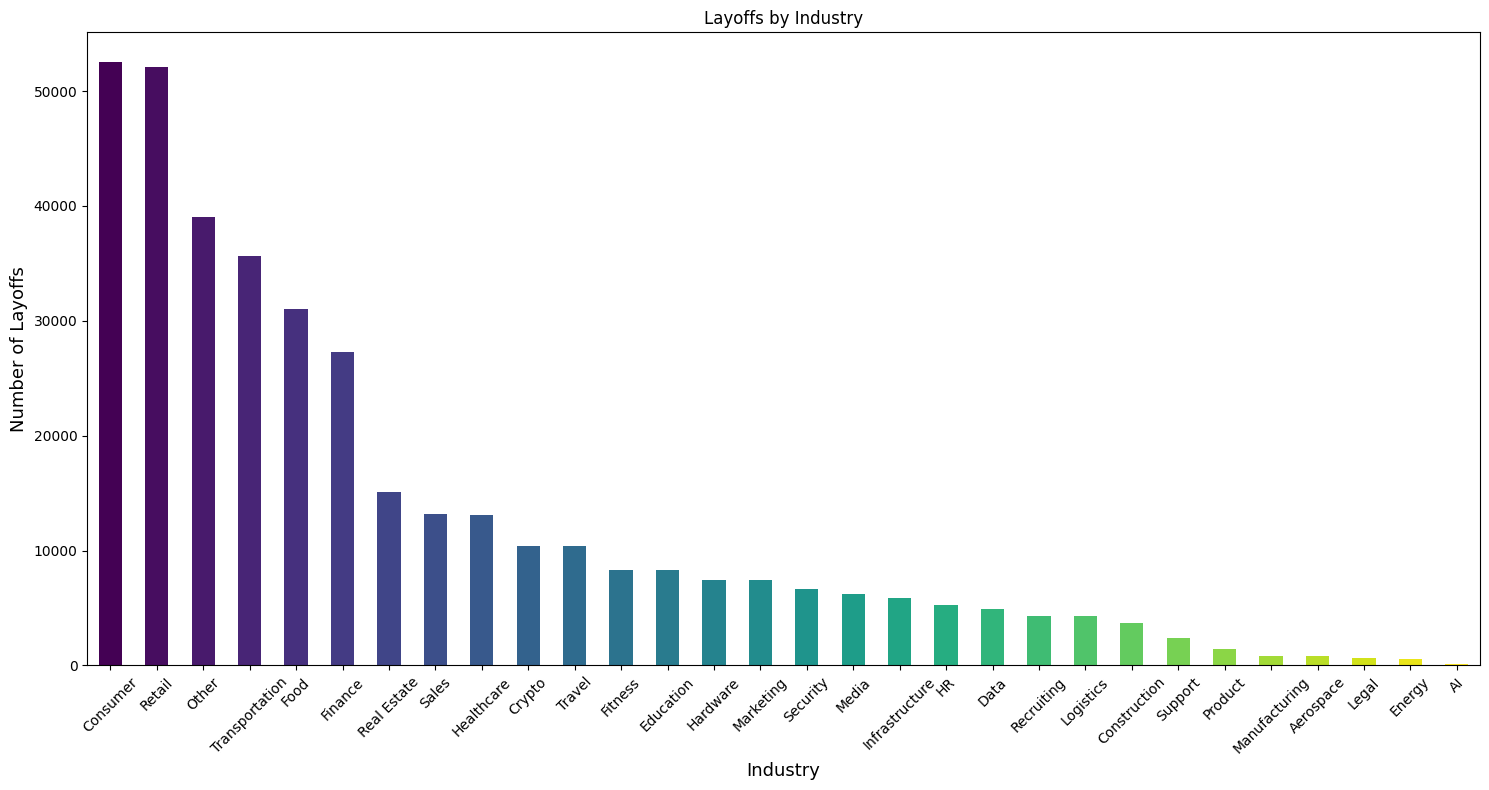

In [11]:
#group data by industry, sum laid-off values
industry_layoffs = df.groupby('Industry')['Laid_Off'].sum().sort_values(ascending=False)

#plot for sum of layoffs
plt.figure(figsize=(15, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(industry_layoffs)))
industry_layoffs.plot(kind='bar', color=colors)
plt.title('Layoffs by Industry')
plt.xlabel('Industry', fontsize = 13)
plt.ylabel('Number of Layoffs', fontsize = 13)
plt.xticks(rotation=45)
plt.tight_layout()

#### t-test between layoffs 2020 vs 2021

**The only significant difference found was between the years 2020 and 2021**

In [12]:
# t-test between lay offs 2020 v 2021

df = df.dropna(subset=['Year', 'Laid_Off'])

# extract
#group1 = df[df['Year'] == 2019]['Laid_Off']
group2 = df[df['Year'] == 2020]['Laid_Off']
group3 = df[df['Year'] == 2021]['Laid_Off']


# check groups not empty
if not group2.empty and not group3.empty:
    t_stat, p_val = stats.ttest_ind(group2, group3, nan_policy='omit')

    print(f"T-statistic: {t_stat}, P-value: {p_val}")
    
else:
    print("One or both groups are empty, cannot perform t-test.")


if p_val < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

T-statistic: -2.6871118862417926, P-value: 0.007556343317608741
There is a significant difference!


In [13]:
# t-test between lay offs 2021 v 2022

df = df.dropna(subset=['Year', 'Laid_Off'])

# extract
#group1 = df[df['Year'] == 2019]['Laid_Off']   // 2019 df = empty, omit
#group2 = df[df['Year'] == 2020]['Laid_Off']
group3 = df[df['Year'] == 2021]['Laid_Off']
group4 = df[df['Year'] == 2022]['Laid_Off']

# check groups not empty
if not group2.empty and not group3.empty:
    t_stat, p_val = stats.ttest_ind(group3, group4, nan_policy='omit')

    print(f"T-statistic: {t_stat}, P-value: {p_val}")
    
else:
    print("One or both groups are empty, cannot perform t-test.")



if p_val < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

T-statistic: 1.3521086863168745, P-value: 0.1768577262747666
There is NOT a significant difference!


In [14]:
# t-test between lay offs 2022 v 2023

df = df.dropna(subset=['Year', 'Laid_Off'])

# extract

group4 = df[df['Year'] == 2022]['Laid_Off']
group5 = df[df['Year'] == 2023]['Laid_Off']

# check groups not empty
if not group2.empty and not group3.empty:
    t_stat, p_val = stats.ttest_ind(group4, group5, nan_policy='omit')

    print(f"T-statistic: {t_stat}, P-value: {p_val}")
    
else:
    print("One or both groups are empty, cannot perform t-test.")

if p_val < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

T-statistic: -2.4465378567686895, P-value: 0.014586247429764637
There is NOT a significant difference!


### ANOVA on layoff rates by industry

In [15]:
# ANOVA on layoff rates by industry
df = df.dropna(subset=['Laid_Off'])

model = ols('Laid_Off ~ C(Industry)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                   sum_sq      df         F    PR(>F)
C(Industry)  5.018778e+07    29.0  2.307856  0.000105
Residual     1.040832e+09  1388.0       NaN       NaN


***The low p-value suggests that there is a statistically significant difference in layoff rates across different industries.***

### Layoffs by year

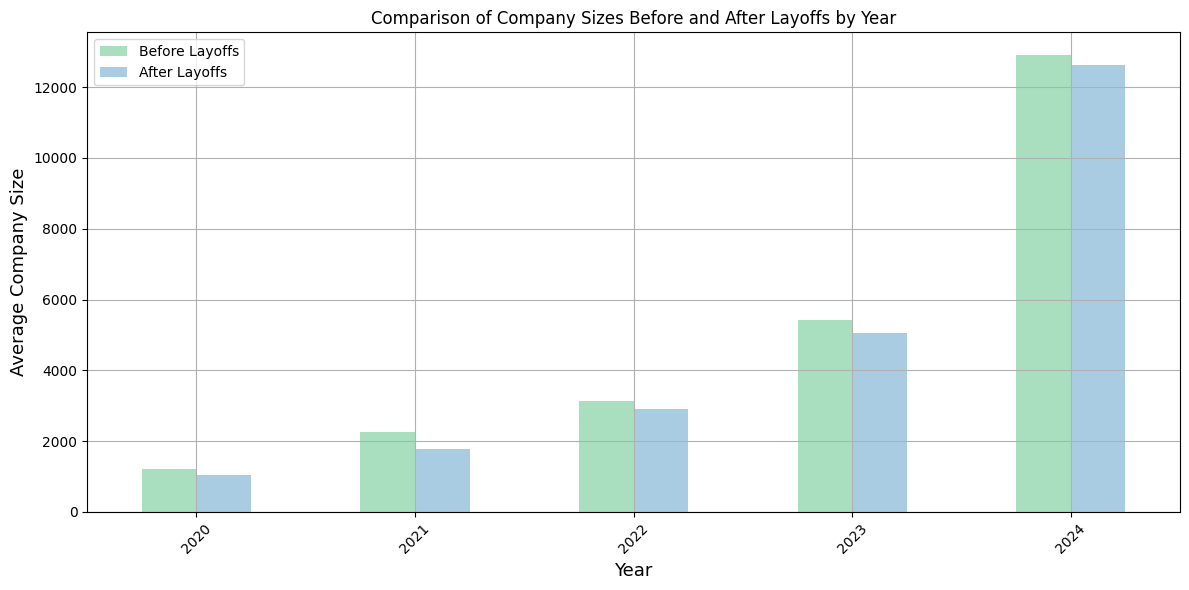

In [16]:
# company size before/after layoffs by industry
industry_sizes = df.groupby('Year').agg({
    'Company_Size_before_Layoffs': 'mean',
    'Company_Size_after_layoffs': 'mean'
})

#plot
industry_sizes.plot(kind = 'bar', figsize = (12, 6), color  = ['#A9DFBF', '#A9CCE3'])
plt.title('Comparison of Company Sizes Before and After Layoffs by Year')
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Average Company Size', fontsize = 13)
plt.xticks(rotation = 45)
plt.legend(['Before Layoffs', 'After Layoffs'])
plt.tight_layout()
plt.grid(True)

***This graph illsutrates the average size of a company in a given year, relative to its size post-layoff. We can see that there is not an overwhelming difference in decrease in size, however 2021 shows an increased chasm between size before layoffs and after layoffs.***

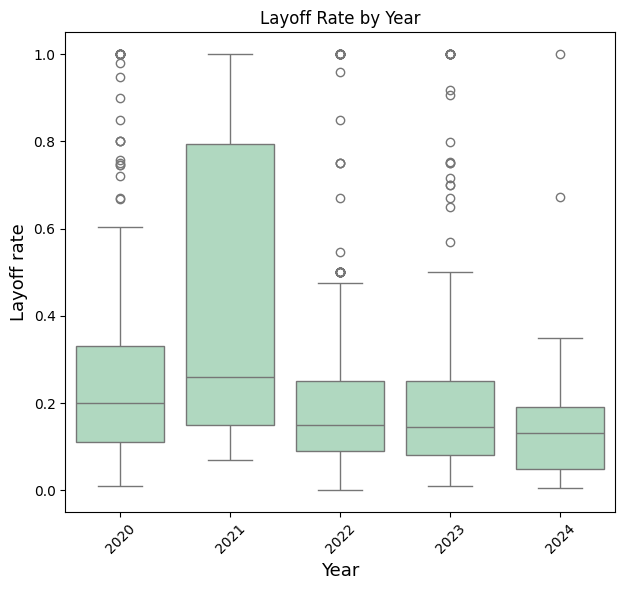

In [17]:
# layoff rate for each company
df['Layoff_Rate'] = df['Laid_Off'] / df['Company_Size_before_Layoffs']

######## plots
plt.figure(figsize=(12, 6))

# layoff rate
plt.subplot(1, 2, 1)
sns.boxplot(x='Year', y='Layoff_Rate', data=df, color = '#A9DFBF')
plt.title('Layoff Rate by Year')
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Layoff rate', fontsize = 13)
plt.xticks(rotation = 45)


plt.tight_layout()
plt.show()

***As demonstrated in the plot, 2021 has the highest mean layoff rate, however, there is a much broader interquartile range, indicating a greater variance in layoff rates. This graphic illustrates 2021 with the greatest variability, which proceeds to decrease and stabilize into 2024.***

### time series analysis

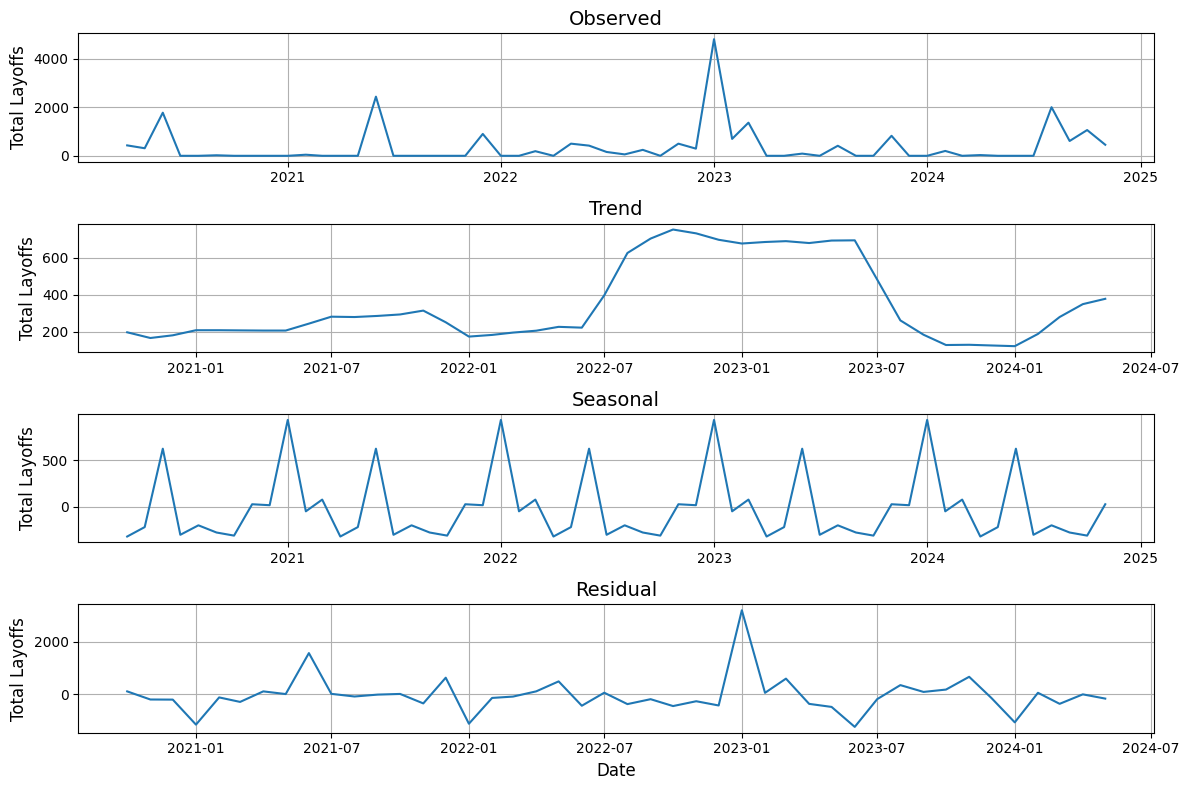

In [18]:
# convert datetime
df['Date_layoffs'] = pd.to_datetime(df['Date_layoffs'])
df.set_index('Date_layoffs', inplace=True)

# aggregate dates if duplicate, sum
df = df.groupby(df.index).sum()

# assign monthly frequency
df = df.asfreq('MS')

# check for missing dates, summing values
df = df.resample('MS').sum()

# seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Laid_Off'], model='additive')

### begin plots ###
plt.figure(figsize=(12, 8))

# observed
plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.title('Observed', fontsize=14)
plt.ylabel('Total Layoffs', fontsize=12)
plt.grid(True)

# trend
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.title('Trend', fontsize=14)
plt.ylabel('Total Layoffs', fontsize=12)
plt.grid(True)

# seasonal
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.title('Seasonal', fontsize=14)
plt.ylabel('Total Layoffs', fontsize=12)
plt.grid(True)

# residual
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.title('Residual', fontsize=14)
plt.ylabel('Total Layoffs', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

***This time series analysis models the observed data, while the trend line details the long-term progression/trend in layoffs. The trend line illustrates a significant increase in layoffs peaking around early 2023, where it then sharply decreases. The seasonal line shows an annual pattern, suggesting a seasonal effect on layoffs, such as an increase in layoffs during certain months of the year. The residual plot -- typically used for identifying anomalies and irregularities in data -- peaks at the start os 2023, indicating a possible unexpected event that caused layoff rates to deviate from their typical trends.*** 

### ANOVA for layoffs across multiple years

In [19]:
###### begin EDA
descriptive_stats = df.describe()

# layoff rate distribution by year
layoff_rate_by_year = df.groupby('Year')['Layoff_Rate'].describe()

# ANOVA, if layoff rates by year differ
layoff_rates_by_year = [group['Layoff_Rate'].values for _, group in df.groupby('Year')]
anova_results = stats.f_oneway(*layoff_rates_by_year)

# output ANOVA
print("Descriptive Statistics:")
print(descriptive_stats)
print("\nLayoff Rate by Year:")
print(layoff_rate_by_year)
print("\nANOVA Test p-value:")
print(anova_results.pvalue)

Descriptive Statistics:
                #     Laid_Off  Percentage  Company_Size_before_Layoffs  \
count     56.0000    56.000000   56.000000                    56.000000   
mean    3278.8750   371.803571   34.997594                  6234.428571   
std     5923.8093   801.078306   52.658018                 25892.209310   
min        0.0000     0.000000    0.000000                     0.000000   
25%        0.0000     0.000000    0.000000                     0.000000   
50%        0.0000     0.000000    0.000000                     0.000000   
75%     3589.7500   421.500000   56.500000                  2519.500000   
max    34482.0000  4800.000000  213.000000                188450.000000   

       Company_Size_after_layoffs          Year         lat         lng  \
count                   56.000000     56.000000   56.000000   56.000000   
mean                  5862.625000   3033.214286   54.113350 -103.186918   
std                  25612.197805   4626.122730   89.385118  172.387546   


***Since the calculated p-value is less than 0.001, the results are highly statistically significant, indicating that the variation in layoff rates across different years is not due to random chance. Therefore, we can reject the null hypthesis.***

### OLS Regression

(on company size before layoffs and year)

In [20]:
# regression analysis 
X = df[['Year', 'Company_Size_before_Layoffs']]
X = sm.add_constant(X) 
y = df['Laid_Off']

# regression model
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:               Laid_Off   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     6.022
Date:                Sun, 10 Mar 2024   Prob (F-statistic):            0.00440
Time:                        04:02:02   Log-Likelihood:                -447.64
No. Observations:                  56   AIC:                             901.3
Df Residuals:                      53   BIC:                             907.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

***The F-statistic and its correlating p-value proves that the overall mdel is statistically significant. The p-value for 'Company_Size_before_Layoffs' suggests it is an important factor in prediciting the number of layoffs, while 'Year' does not have a significant effect (according to this model). The large condition number suggests potential multicolinearity issues (predictors might be correlated with each other)***

## Section 5 of EDA if you need it  - matthew's stuff idk

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

Sort data by funding stages, clean up columns. Scatterplot of Money Raised vs Employees Laid Off, log scale. Stages are also coloured and named in the legend for EDA purposes; also, non-linear stages (Acquired, Private Equity, Subsidiary, Unknown) are not shown.

At a glance we can see that the data is roughly a line from origin outwards, suggesting a positive correlation between the two variables. We can also see that in general, the higher up in money raised and layoffs, the higher the stage the company is likely to be.

It is important to note that companies that are post-ipo may have gone through any number of Series stages, for example a company could go Post-IPO after just a Series A funding stage while another may go Post-IPO after Series A-J.

In [21]:
std_stages = ['Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I', 'Series J', 'Post-IPO']
stages = ['Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I', 'Series J', 'Post-IPO', 
'Acquired', 'Private Equity …', 'Subsidi…', 'Unknown']
df["Money_Raised_in_$_mil"] = df["Money_Raised_in_$_mil"].apply(lambda x: float(str(x).replace("$","")))

df["Stage_i"] = df["Stage"].apply(lambda x: stages.index(x))
df = df.sort_values(by=["Stage_i"])

sns.scatterplot(x="Money_Raised_in_$_mil", y="Laid_Off", hue="Stage", data=df[df["Stage"].isin(std_stages)])
plt.xscale("log")
plt.yscale("log")

ValueError: 'Series BSeries DSeries ASeries CSeries CUnknownSeries CSeries ASeries BSeries CSeries A' is not in list

Note that the majority of companies have funding within the 10^2-10^3 million range. 

<Axes: xlabel='Money_Raised_in_$_mil', ylabel='Count'>

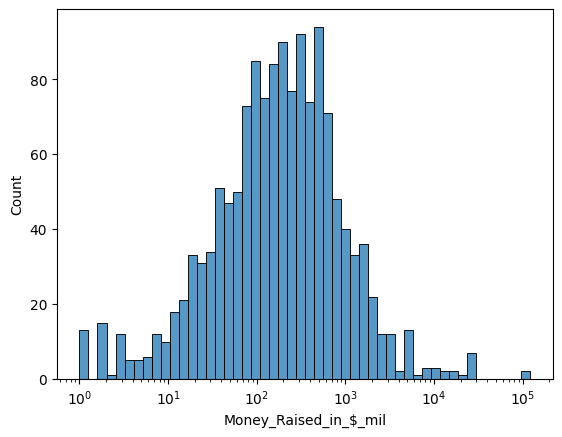

In [ ]:
sns.histplot(x="Money_Raised_in_$_mil", bins=50, data=df, log_scale=True)

Relationship of stage vs money raised. As shown in the scatterplot above, we can usually assume that the further series the company is, the more total funding they have raised. Note that Post-IPO companies have around the same median money raised as those in Series E,F funding -- this may suggest that the majority of companies go public before hitting those series of funding. I've removed outliers / fliers for the benefit of the viewer.

<Axes: xlabel='Money_Raised_in_$_mil', ylabel='Stage'>

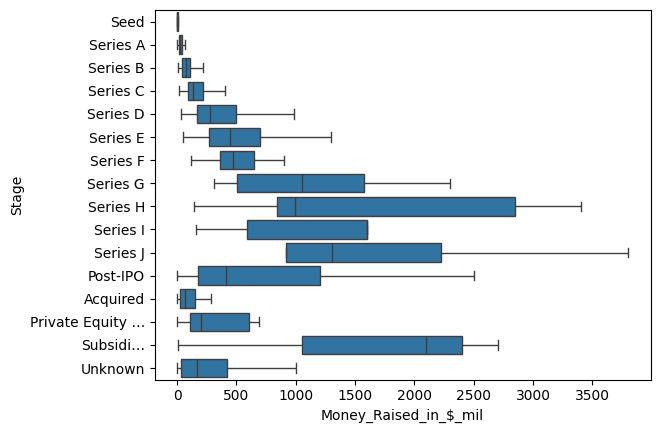

In [ ]:
sns.boxplot(y="Stage", x="Money_Raised_in_$_mil", data=df, showfliers=False)

Relationship of stage vs laid off.  I've removed outliers / fliers for the benefit of the viewer.

We can see that while there is a positve correlation between stage and the number of employees laid off, when we look at it considering the percentage of employees, the amount is much lower.

We can see that a company in the seed stage is in general more likely to lose a much higher percentage of its employees when conducting a layoff, and perhaps more likely to shut down totally.

Conclusion: the more developed a company is, the less likely it is for you to get fired when a layoff does happen (though more people are fired at a time).

<Axes: xlabel='Percentage', ylabel='Stage'>

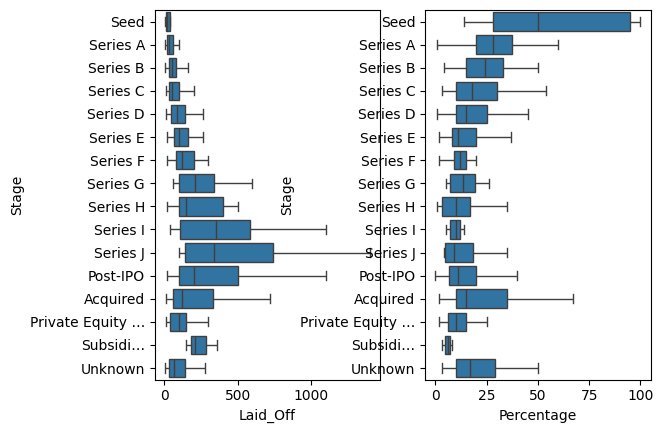

In [ ]:
f, axs = plt.subplots(1,2)
sns.boxplot(y="Stage", x="Laid_Off", data=df, showfliers=False, ax = axs[0])
sns.boxplot(y="Stage", x="Percentage", data=df, showfliers=False, ax = axs[1])

Linear regression of money raised in mil vs employees laid off. We can see a statistically significant correlation: p = 0.000. 

In [ ]:
df["Money_Raised_in_mil"] = df["Money_Raised_in_$_mil"]
outcome, predictors = patsy.dmatrices("Laid_Off ~ Money_Raised_in_mil", df)
mod = sm.OLS(outcome, predictors)  
res_log = mod.fit()
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:               Laid_Off   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     26.57
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           2.91e-07
Time:                        03:07:35   Log-Likelihood:                -11608.
No. Observations:                1418   AIC:                         2.322e+04
Df Residuals:                    1416   BIC:                         2.323e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             248.0949    

In [ ]:
stages=df['Stage'].unique()
list_stages_df = []
for i in stages:
    x = df[df.get('Stage') == i]
    list_stages_df.append(x)
mean_stages_df = []
for i in list_stages_df:
    y = i.get('Percentage').mean()
    mean_stages_df.append(y)
mean_funding_df = []
for i in list_stages_df:
    y = i.get('Funding').mean()
    mean_funding_df.append(y)
plt.bar(stages, mean_funding_df)
bar_width = 0.35
x = np.arange(len(stages))
fig, ax1 = plt.subplots(figsize = (40,10))
bars1 = ax1.bar(x - bar_width/2, mean_stages_df, bar_width, color='blue', alpha=0.5, label='Percent Laid Off')
ax2 = ax1.twinx()
bars2 = ax2.bar(x + bar_width/2, mean_funding_df, bar_width, color='red', alpha=0.5, label='Funding Recieved')
ax1.set_ylabel('Percent Laid Off', color='blue')
ax2.set_ylabel('Funding Recieved', color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(x, stages, rotation=90)
plt.show()

From this double bar graph, we can see that there is an inverse relation between funding and percent laid off. The lower the amount of funds a company recieves, the more the chances of layoff. This is also supported by the scatter plot proving that there is a negative correlation between the two.

In [ ]:
outcome, predictors = patsy.dmatrices('Percentage ~ Funding', df)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

In [ ]:
plt.scatter(df['Funding'], df['Percentage'])
plt.xlabel('Funding')
plt.ylabel('Percentage')
plt.title('Relationship Between Funding in Millions of Dollars and Percentage Laid Off')
linearx = np.arange(df['Funding'].min(), df['Funding'].max())
lineary = linearx * -0.0003 + 22.1073
plt.plot(linearx, lineary)
plt.show()

From this scatter plot, we can see that there is a strong relationship between the funding a company recieves and the percentage of their staff they layoff. With a majoirty of that data on the left side of the graph, the line of best fit looks almot vertical. It also shows that a majoirty of our data is from companies that receive below 40,000,000,000 in funding. We have two outliers on the far right.

In [ ]:
no_outliers = df[df.get('Funding') < 120000]
outcome, predictors = patsy.dmatrices('Percentage ~ Funding', no_outliers)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary()

In [ ]:
plt.scatter(no_outliers['Funding'], no_outliers['Percentage'])
plt.xlabel('Funding')
plt.ylabel('Percentage')
plt.title('Relationship Between Funding in Millions of Dollars and Percentage Laid Off')
linearx = np.arange(no_outliers['Funding'].min(), no_outliers['Funding'].max())
lineary = linearx * -0.0008 + 22.4162
plt.plot(linearx, lineary)
plt.show()

After removing the two outliers we have plotted the regression line and did some statistical analysis. We see that the slope of the regression line is negative showing us that there is an inverse relation between the two. Our P value for the data without the outliers is very small indicating that there is a relationship between the two. 

# Ethics & Privacy

##### Potential ethical concerns and how we plan to address them: 
Our dataset is webscraped from Layoffs.fyi, which contains explicit personal information on individuals who were laid off. Without explicit documentation of informed consent, for the sake of privacy conservation, we will be omitting this information and focusing on the metadata (corporations over the individual). Additionally, Layoffs.fyi only pulls data from news articles, so it is a biased sample that is pulled from data that is only accessible to the public. This dataset is primarily constructed by data contained to the USA, which effectively neglects layoffs that occur in other regions of the world, leading to potentially biased analysis and results. As a result of unsatisfactory observations from foreign countries, we will be orienting our data analysis in the context of the USA's economy. However, we will still include models and representations of non-US observations to provide scope and a point of reference to our data. The timeframe of our data is 2020-2024, which unfortunately excludes a larger historical context regarding layoffs, compounding potential bias and lack of scope. Due to this, our analysis will be further oriented towards a COVID and post-COVID economy.

# Team Expectations 

We expect our team members to be reliable in terms of completing one’s own work/contributions. They should maintain open communication between team members and are expected to communicate any scheduling conflicts for team meetings. They are still expected to complete their work before the meeting even if they are not able to make it. During team meetings, we expect all members to be actively contributing to discussion, and to be professional when discussing conflicts between ideas. Each member will be assigned tasks by the end of the team meeting, and they are expected to arrive to the next team meeting with their task completed sufficiently, and uploaded to the repository, such that we are able to discuss progress and any issues we ran into.

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 02/04 | 1 PM | Read previous COGS 108 Final Projects | Complete previous quarters’ COGS 108 Final Project Analysis, plan meeting times, begin discussing project topics. | 
| 02/05  | 1 PM | Brainstorm project topics, potential data sources, and viability of research questions | Discuss and decide on final project topic; discuss hypothesis; begin background research Discuss ideal dataset(s) and ethics; draft project proposal| 
| 02/11  | 1 PM | Edit, finalize, and submit proposal; Search for datasets | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part |
| 02/18  | 1 PM  | Delegate Tasks and start wrangling | Go over what everyone has done. Make edits or revise things before. Also go over revisions and feedback from the proposal. |
| 02/25  | 1 PM  | Finalize wrangling/EDA; Begin Analysis | Meet for Checkpoint #1 |
| 03/03  | 1 PM  | Discuss final approaches for Data Viz and EDA; Continue Analysis | Meet for Checkpoint #2 |
| 03/06  | 7:30 PM  | Finalize Data Viz and EDA; Begin Analysis | Meet for Checkpoint #2 |
| 03/10  | 1 PM  | Finalize quantitative analysis; Discuss approach to final video submission | Meet for video and final submission semantics |
| 03/13 | 12 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 03/20  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |